# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

----
Notes about the data:\
Pregnancies - number of times pregnant\
Glucose - Plasma Glucose Concentration at 2 Hours in an Oral Glucose Tolerance Test (GTIT)\
Blood Pressure - Diastolic Blood Pressure (mm Hg)\
Skin Thickness - Triceps Skin Fold Thickness (mm)\
Insulin - 2-Hour Serum Insulin Uh/ml)\
BMI - Body Mss Index (Weight in kg / (Height in in))\
Diabetes Pedigree Function - likelihood of diabetes based on family history\
Age - years

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf

In [7]:
#libraries to import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from scipy.stats import loguniform

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
# importing data from csv
df = pd.read_csv('diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [9]:
df.shape

(768, 9)

In [10]:
#checking data types, nulls, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [15]:
# True - number of values = to 0 in each column. 
# While there were no null values, there are many 0 values which cannot be possible considering what they are describing.
for i in df.columns:
    print((df[i] == 0).value_counts())

False    657
True     111
Name: Pregnancies, dtype: int64
False    763
True       5
Name: Glucose, dtype: int64
False    733
True      35
Name: BloodPressure, dtype: int64
False    541
True     227
Name: SkinThickness, dtype: int64
False    394
True     374
Name: Insulin, dtype: int64
False    757
True      11
Name: BMI, dtype: int64
False    768
Name: DiabetesPedigreeFunction, dtype: int64
False    768
Name: Age, dtype: int64
True     500
False    268
Name: Outcome, dtype: int64


In [16]:
# looking at all data where certain values are 0
df[(df['BMI']==0) & (df['BloodPressure']==0) & (df['SkinThickness']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [17]:
# 3 insulin values over 600
df[df['Insulin']>600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0


There are no null values, however it would appear that many values have been changed to zeros. There are some columns where a value of zero is not possible such as glucose, BP, skin thickness and BMI. These values will be filled with the mean values for the column by age group.

There are many 0 values in the Pregnancy and Insulin Columns as well. However it is possible to have zero pregnancies or to be unable to produce insulin so it is difficult to know what to do with these values. For the purpose of this project the pregnancy values will be left unchanged. 

With regards to the insulin values, because almost half of the values are zeros it has a large effect on the project if not dealt with. Without the original data it is difficult to know how to address this. With the youngest age being 21, I will assume that a complete lack of insulin would be discovered already and will therefore also replace the zero values with the age related means for the purpose of this project.

In [18]:
df['Insulin'].max()

846

### Dealing with the 0's

This falls into the Preprocessing section of Part 2, but makes more sense to deal with it now.

In [19]:
# Removing rows with multiple 0 values
df = df[~((df['BMI'] == 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0))]

With the range and outliers of the insulin column, I am going to remove the values over 600. There are only 3 between 600 and 846. With all my nursing resources I have been unable to find official documentation on critical levels over the given >241 range, so am not comfortable removing any more than that.

In [20]:
# Removing 3 insulin values over 600
df = df[df['Insulin'] <= 600]

In [21]:
# replacing 0 with Nans so the zero values don't affect the means
replace_columns = ['BloodPressure', 'SkinThickness', 'BMI', 'Glucose', 'Insulin']
df[replace_columns]= df[replace_columns].replace(0, np.nan)

In [22]:
# replace nan values with mean values
df['SkinThickness'].fillna((df['SkinThickness'].mean()), inplace=True)
df['BloodPressure'].fillna((df['BloodPressure'].mean()), inplace=True)
df['BMI'].fillna((df['BMI'].mean()), inplace=True)
df['Glucose'].fillna((df['Glucose'].mean()), inplace=True)
df['Insulin'].fillna((df['Insulin'].mean()), inplace=True)


In [23]:
# no outcomes vs yes outcomes
df['Outcome'].value_counts()

0    492
1    266
Name: Outcome, dtype: int64

In [24]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,150.936061,33.6,0.627,50,1


### Distribution and Correlation

In [25]:
#checking how certain variables relate to others with correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132399,0.211199,0.083268,0.077839,0.025747,-0.034896,0.551531,0.220622
Glucose,0.132399,1.000000,0.222669,0.193341,0.411601,0.228917,0.117861,0.260575,0.496621
BloodPressure,0.211199,0.222669,1.000000,0.191897,0.077758,0.277665,-0.001385,0.332009,0.170341
SkinThickness,0.083268,0.193341,0.191897,1.000000,0.169789,0.543434,0.095107,0.131516,0.219419
Insulin,0.077839,0.411601,0.077758,0.169789,1.000000,0.161555,0.063694,0.131008,0.237465
BMI,0.025747,0.228917,0.277665,0.543434,0.161555,1.000000,0.153758,0.030311,0.319409
DiabetesPedigreeFunction,-0.034896,0.117861,-0.001385,0.095107,0.063694,0.153758,1.000000,0.031145,0.181461
Age,0.551531,0.260575,0.332009,0.131516,0.131008,0.030311,0.031145,1.000000,0.231829
Outcome,0.220622,0.496621,0.170341,0.219419,0.237465,0.319409,0.181461,0.231829,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

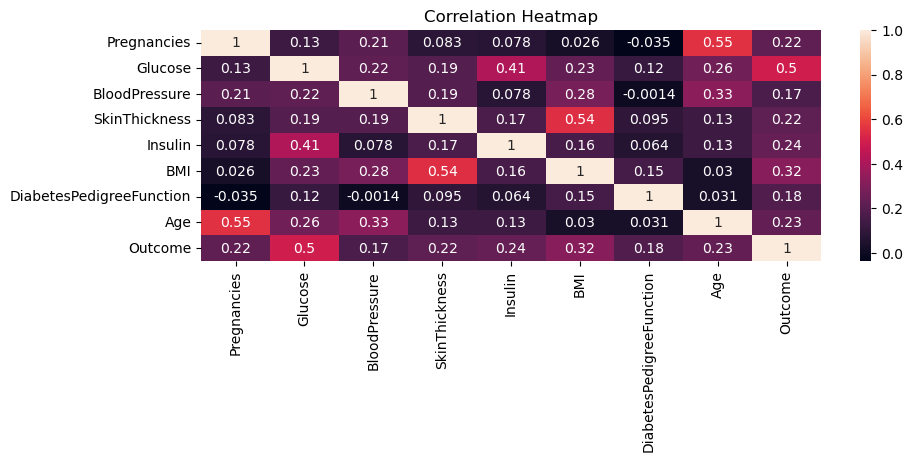

In [26]:
# Creating correlation heatmap
plt.figure(figsize=(10,3))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

Looking at the correlation matrix and heatmap you can see that there are positive correlations for all the predictor variables to the outcome. However they are not terribly strong. The strongest correlation is between Glucose level and the outcome, which makes sense as glucose levels are the main factor in diagnosing diabetes. 

When looking at the correlations between the individual predictor variables, the highest positive correlations are between pregnancies and age (which seems like an obvious relation) and Skin thickness and BMI which I wouldn't have initially thought of. There is also a lesser positive correlations between Glucose levels and insulin levels. This is an interesting correlation as insulin is what helps your body process your glucose intake, but this mechanism is altered or impaired in those with diabetes. 

#### Distribution

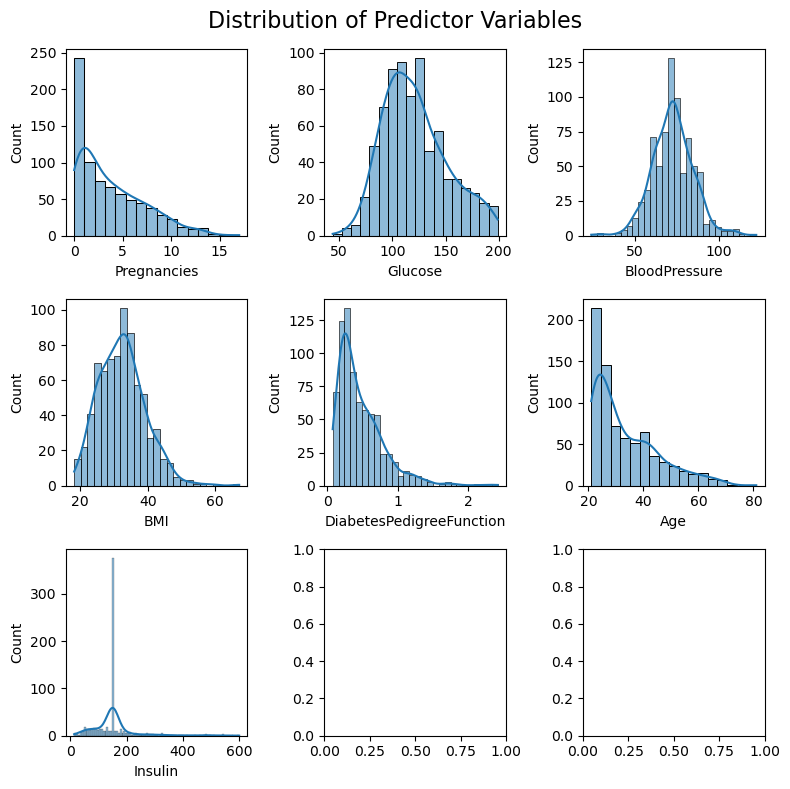

In [27]:
# Showing distribution for the predictor variables

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

sns.histplot(data=df, x='Pregnancies', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='Glucose', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='BloodPressure', kde=True, ax=axes[0,2])
sns.histplot(data=df, x='BMI', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='DiabetesPedigreeFunction', kde=True, ax=axes[1,1])
sns.histplot(data=df, x='Age', kde=True, ax=axes[1,2])
sns.histplot(data=df, x='Insulin', kde=True, ax=axes[2,0])

fig.suptitle('Distribution of Predictor Variables', fontsize=16)
plt.tight_layout()

The distribution of the Values for glucose, blood pressure, BMI and Insulin all look like they have a reasonably normal distribution. Still need to look with the outliers in the insulin column shortly.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

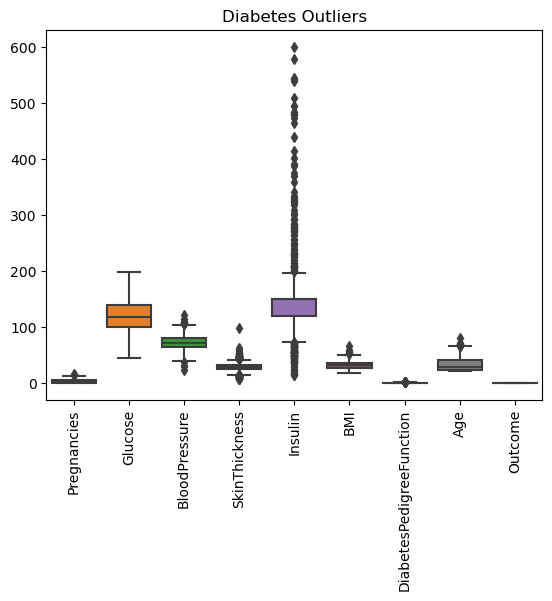

In [28]:
# Boxplot to check for outliers. 

sns.boxplot(df).set_title('Diabetes Outliers')
plt.xticks(rotation=90)

In [29]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Comparison of Diabetic to Non-Diabetic

In [966]:
# data for both
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,3.849604,121.686587,72.401370,29.139405,150.936061,32.428647,0.471842,33.306069,0.350923
std,3.372680,30.231341,12.150498,8.837633,76.567386,6.880411,0.325676,11.759534,0.477574
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,120.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.500000,72.000000,29.139405,150.936061,32.350000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,150.936061,36.600000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,600.000000,67.100000,2.420000,81.000000,1.000000


In [967]:
# data for individuals with diabetes

df_db = df[df['Outcome']==1]
df_db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0
mean,4.860902,142.091628,75.214363,31.774918,175.647520,35.415521,0.552162,37.011278,1.0
std,3.734517,29.465812,11.953222,8.663401,87.575703,6.609471,0.373212,10.918042,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,119.250000,68.000000,29.139405,150.936061,30.925000,0.263250,28.000000,1.0
50%,4.000000,140.000000,74.000000,29.139405,150.936061,34.300000,0.451500,36.000000,1.0
75%,8.000000,166.750000,82.000000,36.000000,167.000000,38.925000,0.730000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000,1.0


In [968]:
#Data for individuals with without diabetes

df_non_db = df[df['Outcome']==0]
df_non_db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,3.302846,110.654593,70.880524,27.714514,137.575801,30.813793,0.428417,31.302846,0.0
std,3.025983,24.350375,11.995714,8.608782,66.253971,6.477873,0.288038,11.722163,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.750000,62.000000,22.000000,94.000000,25.600000,0.230750,23.000000,0.0
50%,2.000000,108.000000,71.000000,29.139405,150.936061,30.100000,0.337500,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,150.936061,35.300000,0.565750,37.000000,0.0
max,13.000000,194.000000,122.000000,60.000000,545.000000,57.300000,1.781000,81.000000,0.0


Average age for data set 33

Average glucose for individuals with diabetes 142.2\
Average glucose for individuals without diabetes 110.6

Average BMI for individuals with diabetes 35.4\
Average BMI for individuals without diabetes 30.8

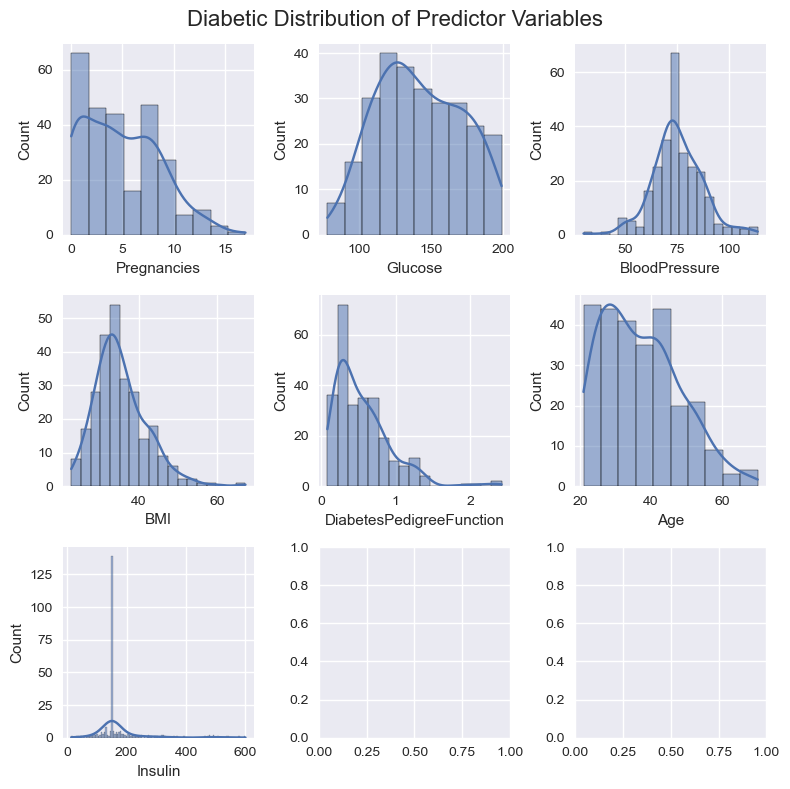

In [969]:
#distribution of values for individuals with diabetes

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

sns.histplot(data=df_db, x='Pregnancies', kde=True, ax=axes[0,0])
sns.histplot(data=df_db, x='Glucose', kde=True, ax=axes[0,1])
sns.histplot(data=df_db, x='BloodPressure', kde=True, ax=axes[0,2])
sns.histplot(data=df_db, x='BMI', kde=True, ax=axes[1,0])
sns.histplot(data=df_db, x='DiabetesPedigreeFunction', kde=True, ax=axes[1,1])
sns.histplot(data=df_db, x='Age', kde=True, ax=axes[1,2])
sns.histplot(data=df_db, x='Insulin', kde=True, ax=axes[2,0])

fig.suptitle('Diabetic Distribution of Predictor Variables', fontsize=16)
plt.tight_layout()

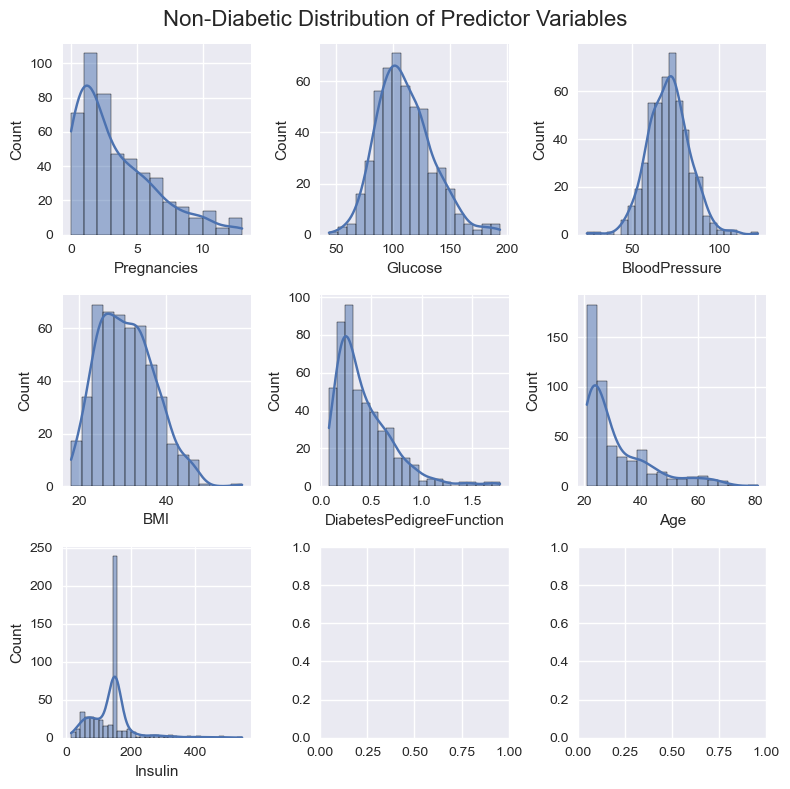

In [970]:
#distribution of values for individuals with without diabetes

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

sns.histplot(data=df_non_db, x='Pregnancies', kde=True, ax=axes[0,0])
sns.histplot(data=df_non_db, x='Glucose', kde=True, ax=axes[0,1])
sns.histplot(data=df_non_db, x='BloodPressure', kde=True, ax=axes[0,2])
sns.histplot(data=df_non_db, x='BMI', kde=True, ax=axes[1,0])
sns.histplot(data=df_non_db, x='DiabetesPedigreeFunction', kde=True, ax=axes[1,1])
sns.histplot(data=df_non_db, x='Age', kde=True, ax=axes[1,2])
sns.histplot(data=df_non_db, x='Insulin', kde=True, ax=axes[2,0])

fig.suptitle('Non-Diabetic Distribution of Predictor Variables', fontsize=16)
plt.tight_layout()

While the distributions for each group is similar, the distributions for non-diabetics is a bit more normal looking. Especially when looking at pregnancies, glucose and age.

Differences by gender will not be addressed as that information is not available.

# Part II : Preprocessing & Feature Engineering


You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

----
It was discovered in the previous section that there were no missing values, but many values were changed to 0 and those were dealt with in the previous section.

### Outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

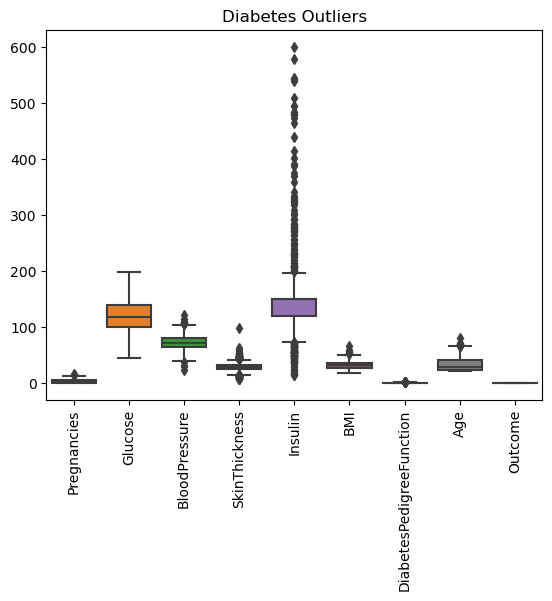

In [30]:
# Boxplot to check for outliers. 

sns.boxplot(df).set_title('Diabetes Outliers')
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, '0')])

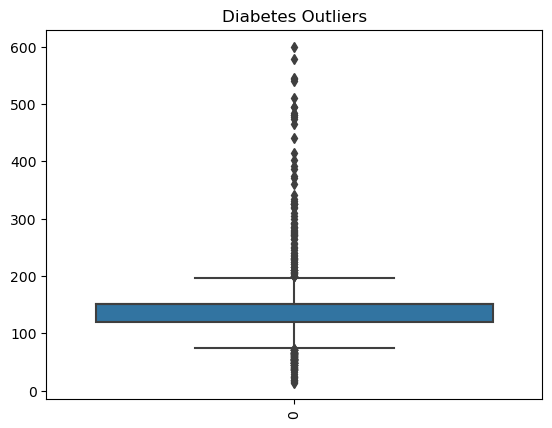

In [31]:
#Looking at specifically the Insulin distribution

sns.boxplot(df['Insulin']).set_title('Diabetes Outliers')
plt.xticks(rotation=90)

There are many values that would be considered outliers within these variables, but removing them would be removing a substantial amount of data and I can not be sure that they are erronous entries.

### Scaling and Normalization

I have decided to use the RobustScaler from scikit as it is less affected by outliers.

In [33]:
# removing binary outcome from scaling data

data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(758, 8) (758,)


In [34]:
# using robust scaler on data excluding outcome
scaler = RobustScaler()
df_scaled = scaler.fit_transform(X)

In [35]:
df_scaled

array([[ 0.6       ,  0.7625    ,  0.        , ...,  0.13736264,
         0.65409623,  1.23529412],
       [-0.4       , -0.8125    , -0.375     , ..., -0.63186813,
        -0.06371912,  0.11764706],
       [ 1.        ,  1.6375    , -0.5       , ..., -0.99450549,
         0.77113134,  0.17647059],
       ...,
       [ 0.4       ,  0.0875    ,  0.        , ..., -0.67582418,
        -0.33940182,  0.05882353],
       [-0.4       ,  0.2125    , -0.75      , ..., -0.24725275,
        -0.06892068,  1.05882353],
       [-0.4       , -0.6125    , -0.125     , ..., -0.21428571,
        -0.1573472 , -0.35294118]])

In [36]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [37]:
print(X_train.shape ,X_test.shape)

(530, 8) (228, 8)


In [38]:
print(y_train.shape ,y_test.shape)

(530,) (228,)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Logistic Regression

In [44]:
# Training logistic regression model

LR_model=LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
space['max_iter'] = [5000]

In [45]:
# RandomizedSearchCV set-u
search = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='accuracy',cv=5,random_state=1)

In [46]:
# Fit to model
result = search.fit(X_train,y_train)

C:\Users\mufff\anaconda3\envs\LHL_python_environment\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mufff\anaconda3\envs\LHL_python_environment\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mufff\anaconda3\envs\LHL_python_environment\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mufff\anaconda3\envs\LHL_python_environment\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mufff\anaconda3\envs\LHL_python_environment\lib\site-packag

In [47]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.781132075471698
Best Hyperparameters: {'C': 3.225969977312604, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}


In [75]:
#Training model with best hyperparameters
best_model = result.best_estimator_
best_model.fit(X_train,y_train)

LogisticRegression(C=3.225969977312604, max_iter=5000, solver='liblinear')

In [76]:
#testing model
LR_pred = best_model.predict(X_test)

In [77]:
#confusion matrix
confusion_matrix(y_test, LR_pred)

array([[124,  17],
       [ 37,  50]], dtype=int64)

This confusion matrix tells us that the model classified:\
124 cases correctly classified as positive\
17 positive cases incorrectly classified as negative\
37 negative cases incorrectly classified as positive\
50 cases correctly classified as negative

In [78]:
# evaluating model with accuracy score
acc=accuracy_score(y_test,LR_pred)
acc

0.7631578947368421

In [79]:
# F1-score
f1_score_LG = f1_score(y_test,LR_pred)
print(f1_score_LG)

0.6493506493506493


In [80]:
# ROC-AUC evaluation
LR_pred_prob = best_model.predict_proba(X_test)
auc_score_LR = roc_auc_score(y_test, LR_pred_prob[:,1])
auc_score_LR

0.8368794326241135

In [81]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, LR_pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

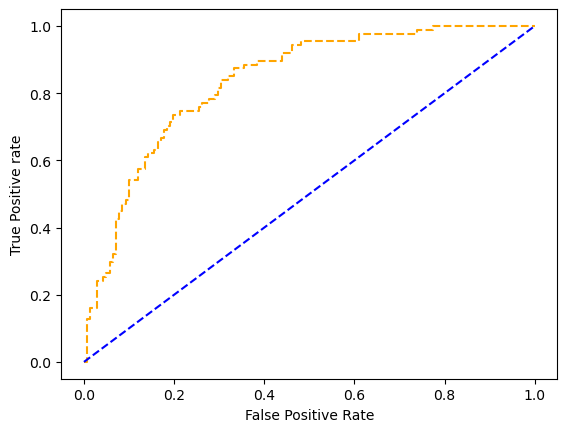

In [82]:
#Plottin ROC curve
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

## Emsemble - Random Forest Classifier

In [83]:
# set up for RandomForestClassifier with RandomizedSearchCV
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30],      
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=32, random_state=3)
results2 = random_search.fit(X_train, y_train)

In [84]:
print('Best score: ', results2.best_score_)
print('Best Hyperparameters: ', results2.best_params_)

Best score:  0.7830188679245282
Best Hyperparameters:  {'n_estimators': 100, 'max_depth': None, 'criterion': 'gini'}


In [93]:
#training model with best parameters
best_model_rct = results2.best_estimator_
best_model_rct.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
#new model test
rfc_pred=best_model_rct.predict(X_test)

In [108]:
# confusion matrix
confusion_matrix(y_test, rfc_pred)

array([[114,  27],
       [ 34,  53]], dtype=int64)

This confusion matrix tells us that the model classified:\
114 cases correctly classified as positive\
27 positive cases incorrectly classified as negative\
34 negative cases incorrectly classified as positive\
53 cases correctly classified as negative

In [97]:
#accuracy score
acc_rfc=accuracy_score(y_test,rfc_pred)
acc_rfc

0.7324561403508771

In [98]:
#f1 score
f1_score_rfc = f1_score(y_test,rfc_pred)
print(f1_score_rfc)

0.6347305389221558


In [99]:
#AUC score
rfc_pred_prob = random_search.predict_proba(X_test)
auc_score_rfc = roc_auc_score(y_test, rfc_pred_prob[:, 1])
auc_score_rfc

0.7900057063666748

In [100]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, rfc_pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)

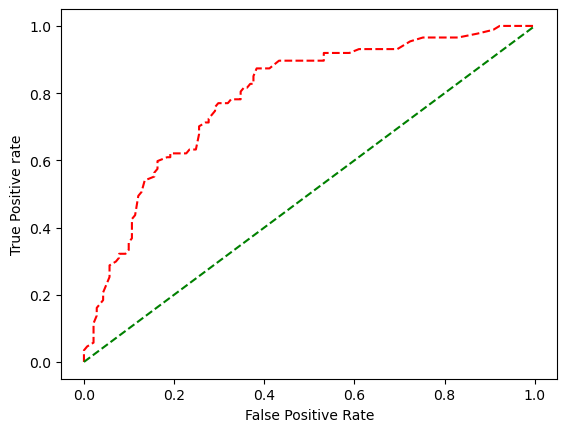

In [101]:
#Plottin ROC curve
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

VotingClassifier

In [102]:
# Set up for voting classifer
logistic_model = LogisticRegression(max_iter=1000)

classifiers={
    'Decision tree': DecisionTreeClassifier(max_depth=5),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logisitic Regression': logistic_model,
}

In [109]:
# Training and fitting
ensemble = VotingClassifier(list(classifiers.items()), voting='soft')
ensemble.fit(X_train, np.ravel(y_train))

VotingClassifier(estimators=[('Decision tree',
                              DecisionTreeClassifier(max_depth=5)),
                             ('KNN', KNeighborsClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('Logisitic Regression',
                              LogisticRegression(max_iter=1000))],
                 voting='soft')

In [110]:
# overall results
print('Ensemble performance: \n')
print('Training error: %.2f' % (1-ensemble.score(X_train, y_train)))
print('Validation error: %.2f' % (1-ensemble.score(X_test, y_test)))

Ensemble performance: 

Training error: 0.19
Validation error: 0.25


In [106]:
# Performance of the individual models
for name, estimator in zip(ensemble.named_estimators_.keys(), ensemble.named_estimators_.values()):
    tr_err = 1 - estimator.score(X_train, y_train)
    te_err = 1 - estimator.score(X_test, y_test)
    print('%s: Train_error: %0.3f; Validation error: %0.3f' % (name, tr_err, te_err))

Decision tree: Train_error: 0.157; Validation error: 0.311
KNN: Train_error: 0.204; Validation error: 0.285
Naive Bayes: Train_error: 0.243; Validation error: 0.250
Logisitic Regression: Train_error: 0.226; Validation error: 0.228


In [111]:
#testing model
VC_pred = ensemble.predict(X_test)

In [114]:
#accuracy score
acc_vc = accuracy_score(y_test,VC_pred)
acc_vc

0.7543859649122807

In [115]:
#f1 score
f1_score_vc = f1_score(y_test,VC_pred)
f1_score_vc

0.6666666666666666

In [116]:
#auc score
vc_pred_prob = ensemble.predict_proba(X_test)
auc_score_vc = roc_auc_score(y_test, vc_pred_prob[:, 1])
auc_score_vc

0.8143800440205429

In [117]:
#over all results

print('Logistic Regression:      Accuracy:', acc,  'F1 Score:',f1_score_LG,  'AUC Score:', auc_score_LR)
print('Random Forest Classifier: Accuracy:', acc_rfc, 'F1 Score:', f1_score_rfc, 'AUC Score:', auc_score_rfc)
print('Voting Classifier:        Accuracy:', acc_vc, 'F1 Score:', f1_score_vc, 'AUC Score:', auc_score_vc)

Logistic Regression:      Accuracy: 0.7631578947368421 F1 Score: 0.6493506493506493 AUC Score: 0.8368794326241135
Random Forest Classifier: Accuracy: 0.7324561403508771 F1 Score: 0.6347305389221558 AUC Score: 0.7900057063666748
Voting Classifier:        Accuracy: 0.7543859649122807 F1 Score: 0.6666666666666666 AUC Score: 0.8143800440205429


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

-I did a lot of looking into the original data trying to find out how the 'zero' values were decided on. It would've been nice to be able to run all of the models knowing that the data in the set was legitimate. Especially when it comes to the Insulin column.

-From the Voting Classifier, we can see the decision tree did well on the training data, but not as good as the other models on the unseen data. 

-The logistic regression had the lowest validation error and showed consistency between training and testing. This is also confirmed as the primary choice in models with the highest accuracy score of 76% and the highest auc score of 84%. 

-I expected the ensemble methods to do a lot better.The only one that scored higher was the Voting classifier on the F1 score showing a better balance between precision and recall. However all of the numbers are so close that choosing the correct model would depend on the goals of the project. With more experience, additional parameter tweaking could be done to see if the numbers would vary more.